In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Select the load case
input_file = "Shear_and_Moment_6 Paddlers.csv" # or "Shear_and_Moment_2 Paddlers.csv"

script_dir = os.path.abspath('data')
file_path = os.path.join(script_dir, input_file)
info = pd.read_csv(file_path, header=None)

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import _canoeValues as cv

#-------------------Inputs-------------------------------------------------------------
script = "Longitudinal Analysis_6 Paddler.ipynb"
input_file = "Station Information.csv"
outerHull_file = "Outer Hull.csv" # Will be used for hydrostatic force and waterline calculation
# DLF = 1.25 # Dead Load Factor
# LLF = 1.5 # Live Load Factor
# pad_male = 163.28 # Weight of male padder (kg)
# pad_female = 68.03 # Weight of female paddler (kg)
# water_den = 1000 # Density of water = 1000 kg/m^3
#--------------------------------------------------------------------------------------

script_dir = os.path.abspath('data')# absolute file path in Jupyter
file_path = os.path.join(script_dir, input_file) # file path for the text file input
canoe_info = pd.read_csv(file_path, header=None)
statVol = canoe_info[1][1:]
statMass = canoe_info[2]

file_path = os.path.join(script_dir, outerHull_file) # file path for the text file input
out_coor = pd.read_csv(file_path, header=None)
x_out = out_coor[0]
y_out = out_coor[1]
z_out = out_coor[2]

station_no = x_out.nunique() # number of stations
station = x_out.unique() # location of each station

print(station_no)
print(station)

57
[   0.        100.892857  201.785714  302.678571  403.571429  504.464286
  605.357143  706.25      807.142857  908.035714 1008.928571 1109.821429
 1210.714286 1311.607143 1412.5      1513.392857 1614.285714 1715.178571
 1816.071429 1916.964286 2017.857143 2118.75     2219.642857 2320.535714
 2421.428571 2522.321429 2623.214286 2724.107143 2826.       2925.892857
 3026.785714 3127.678571 3228.571429 3329.464286 3430.357143 3531.25
 3632.142857 3733.035714 3833.928571 3934.821429 4035.714286 4136.607143
 4237.5      4338.392857 4439.285714 4540.178571 4641.071429 4741.964286
 4842.857143 4943.75     5044.642857 5145.535714 5246.428571 5347.321429
 5448.214286 5549.107143 5650.      ]


[74524.05981866666, 104659.73512533333, 127648.30139733333, 144573.037568, 157374.144, 167378.10824533334, 175477.86752, 182265.2163413333, 188124.15505066665, 193300.5248, 197946.790912, 202157.17742933333, 205990.38122666665, 209479.67027199996, 212647.32569599996, 215507.36017066665, 218069.13280000002, 220342.91643733333, 222336.07918933337, 224056.51106133335, 225512.71714133333, 226714.11191466666, 227671.28541866667, 228396.400896, 228903.97269333331, 229211.84802133334, 229347.301888, 229347.301888, 229211.84802133334, 228903.97269333331, 228396.400896, 227671.28541866667, 226714.11191466666, 225512.71714133333, 224056.51106133335, 222336.07918933337, 220342.91643733333, 218069.13280000002, 215507.36017066665, 212647.32569599996, 209479.67027199996, 205990.38122666665, 202157.17742933333, 197946.790912, 193300.5248, 188124.15505066665, 182265.2163413333, 175477.86752, 167378.10824533334, 157374.144, 144573.037568, 127648.30139733333, 104659.73512533333, 74524.05981866666]
[1550

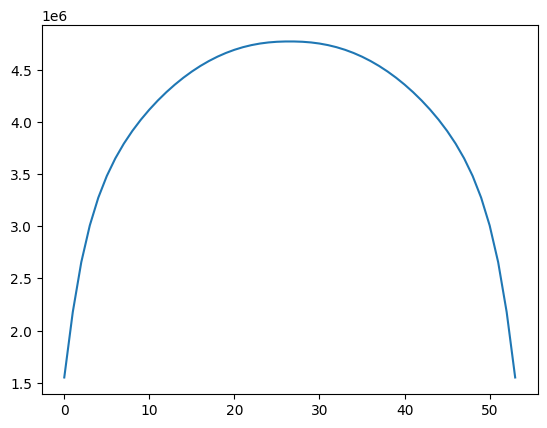

In [2]:
#Thin Rectangle Torsion Analysis

J = []

# Loop through stations in outer hull
for k in range(1,station_no-2):

    # Coordinates of points in the outer frame sharing an X-coordinate with the current station
    X1_value = station[k]
    Y1 = []
    Z1 = []

    # Coordinates of points in the outer frame sharing an X-coordinate with the next station
    X2_value = station[k+1]
    Y2 = []
    Z2 = []

    # Loop through each x coordinate in the inner hull
    for i in range(0,len(x_out),1):

        # If the coordinate is aligned with the second station on the X-axis, store this XYZ coordinate
        if x_out[i] == X1_value:
            Y1.append(y_out[i])
            Z1.append(z_out[i])

        # Otherwise, if the coordinate is aligned with the second station on the X-axis, store this XYZ coordinate
        elif x_out[i] == X2_value:
            Y2.append(y_out[i])
            Z2.append(z_out[i])

    # Now we have the coords of the outer station
    stationWidth = abs((max(Y1) + max(Y2))/2 - (min(Y1) + min(Y2))/2)
    stationDepth = abs((max(Z1) + max(Z2))/2 - (min(Z1) + min(Z2))/2)
    concretethickness = cv.concrete_thickness


    #LHS
    J_LHS = (stationDepth-concretethickness/2)*(concretethickness**3) # mm^4
    #Bottom
    J_Bottom = (stationWidth-concretethickness)*(concretethickness**3) # mm^4
    #RHS
    J_RHS = (stationDepth-concretethickness/2)*(concretethickness**3) # mm^4

    #Polar Moment of Inertia
    J.append((1/3)*(J_LHS+J_Bottom+J_RHS)) #mm^4

print(J)

T = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 630986.8465689991, 630986.8465689991, 630986.8465689991, 630986.8465689991, 630986.8465689991, 630986.8465689991, 630986.8465689991, 630986.8465689991, 630986.8465689991, 630986.8465689991, 630986.8465689991, 630986.8465689991, 630986.8465689991, 630986.8465689991, 630986.8465689991, 630986.8465689991, 630986.8465689991, 630986.8465689991, 630986.8465689991, 630986.8465689991, 630986.8465689991, 630986.8465689991, 630986.8465689991, 630986.8465689991, 630986.8465689991, 630986.8465689991, 630986.8465689991, 630986.8465689991, 630986.8465689991, 0, 0, 0, 0, 0, 0, 0, 0, 0]

torsionalStress = []
for i in range(1, station_no-2, 1):
    torsionalStress.append(T[i]/J[i-1] * concretethickness) # (N*mm / mm^4) * mm => N/mm^2

T_max_station = [0.2 * cv.compressive_strength * x * concretethickness for x in J] # N/mm^2 * mm^4 * mm = N*mm^3
print(T_max_station)

plt.plot(range(len(T_max_station)), T_max_station)
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.show()

# plt.plot(range(len(torsionalStress)), torsionalStress)
# plt.title('')
# plt.xlabel('x (stations)')
# plt.ylabel('(N/mm^2 = MPa)')
# plt.show()

# This script just prints values calculated in the load case script

In [3]:
# Positive Shear
value = float(info[1][1])
width = float(info[3][1])

torsion_resistance_positive = value * width/1000 # Nm
print("Tortional Resistance: " + str(torsion_resistance_positive) + " Nm")
print(width)

Tortional Resistance: 408.7726545008133 Nm
533.75004


In [4]:
# Negative Shear
value = float(info[1][2])
width = float(info[3][2])

torsion_resistance_negative = value * width/1000 # Nm
print("Tortional Resistance: " + str(torsion_resistance_negative) + " Nm")
print(width)

Tortional Resistance: -408.772654500813 Nm
533.75004
